In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00


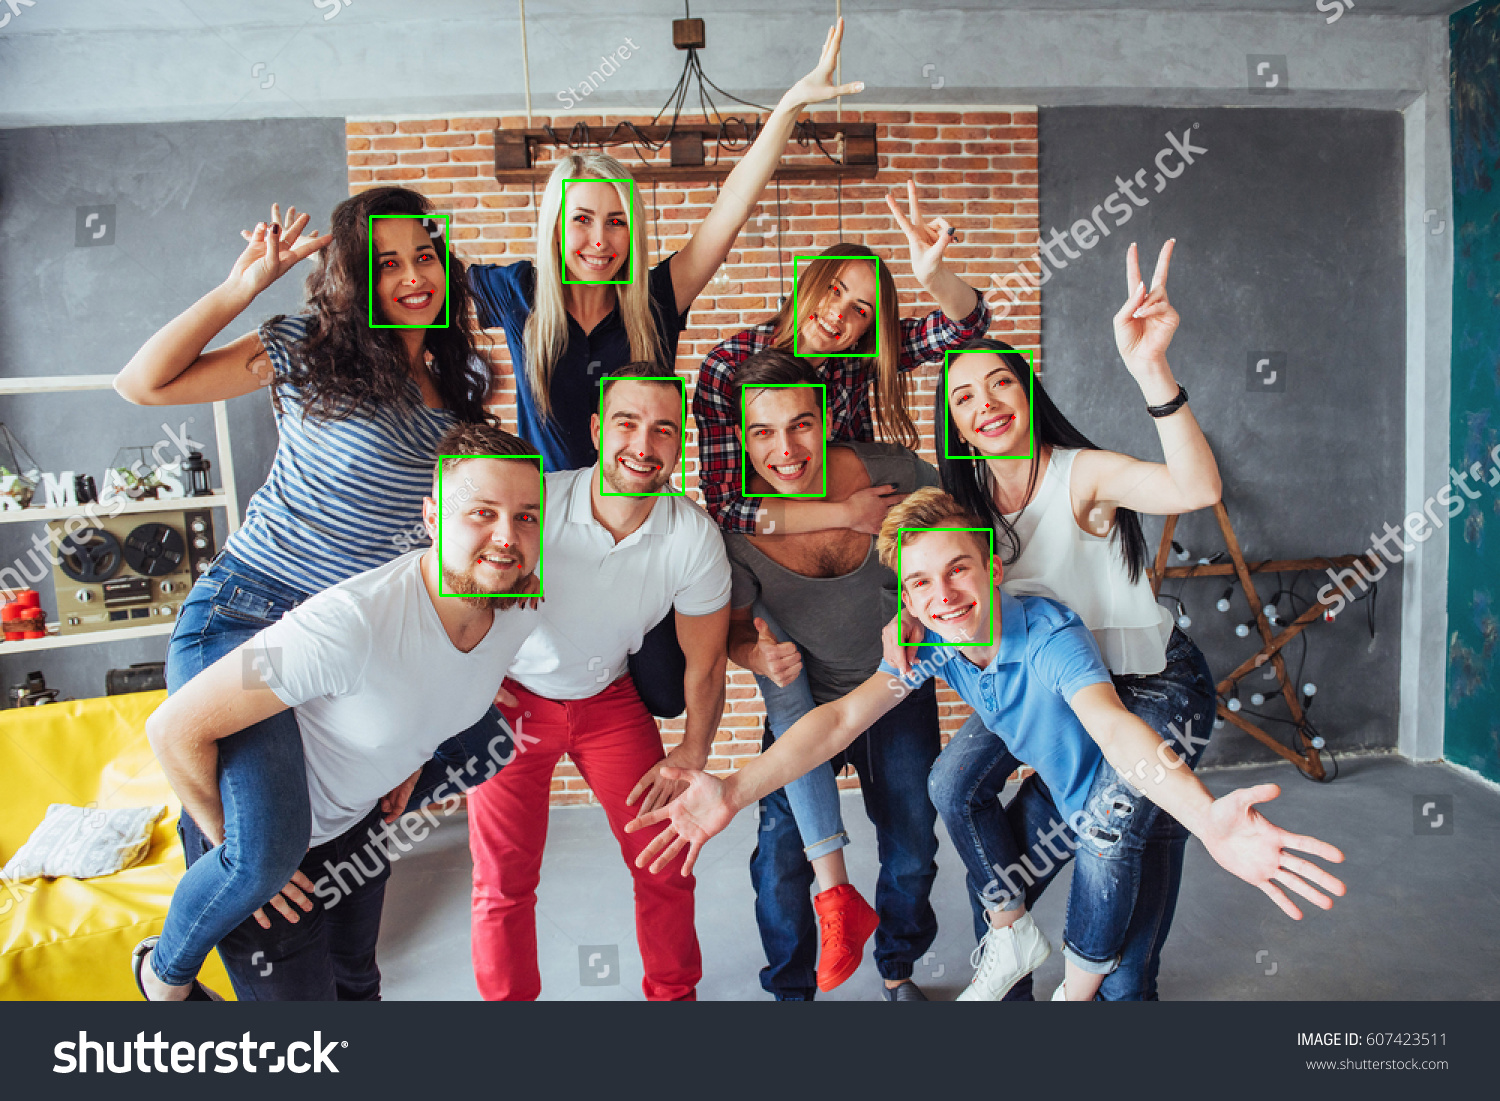

Face detection complete. Output saved as output_optimized.jpg


In [ ]:
from mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

# Initialize detector with default parameters
detector = MTCNN()

# Load image and convert to RGB (MTCNN expects RGB)
# Make sure 'image.jpg' is uploaded to your Colab environment
image = cv2.imread("image.jpg")

# Check if image was loaded successfully
if image is None:
    print("Error: Could not load image. Please make sure 'image.jpg' is in the correct directory.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces with confidence filtering
    faces = [face for face in detector.detect_faces(image_rgb)
             if face['confidence'] > 0.95]  # Keep only high-confidence detections

    # Draw results
    output = image.copy()
    for face in faces:
        x, y, w, h = face['box']

        # Ensure coordinates are within image bounds
        x, y = max(0, x), max(0, y)
        w, h = min(w, output.shape[1] - x), min(h, output.shape[0] - y)

        # Draw bounding box (green)
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Draw landmarks (red)
        for (lx, ly) in face['keypoints'].values():
            cv2.circle(output, (int(lx), int(ly)), 2, (0, 0, 255), -1)

    # Display and save
    cv2_imshow(output) # Use cv2_imshow for displaying in Colab
    cv2.imwrite("output_optimized.jpg", output)
    print("Face detection complete. Output saved as output_optimized.jpg")